### BCB546X Python Assignment
### This markdown contains codes and description for the Python assignment for the BCB546x Biodata skills


#### Importing all packages required for the codes to run. 

In [7]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
import numpy as np

 #### 1. The following block codes for a function that read a fasta file and stores each description and sequence in a dictionary. 

In [11]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {} #declaring an empty dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): # parsing the fasta file supplied for each record
        description = record.description.split() # splits each word in the description of the record
        species_name = description[1] + " " + description[2] # the second and third element of the list as the speceis name 
        sequence_data_dict[species_name] = record.seq #adding the species name and sequence to the dictionary
    return(sequence_data_dict) #return the dictionary as the result of the functio

In [12]:
seq = get_sequences_from_file("bears_cytb.fasta")
seq

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet()),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA', SingleLetterAlphabet()),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA', SingleLetterAlphabet()),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...A

In [14]:
test_CDS = "ATGACCAACATCCGAAAAACTCACTAA" # contains a small CDS sequence for testing the translate function
test_DNA = "TTTATGACCAACATCCGAAAAACTCACTAGTTT" #contains a DNA sequence with a small ORF 

#### 2. The following are the codes for a function that translate a DNA sequence into an Amino acid sequence. This function assume translation starts at the first site. 

In [17]:
def translate_CDS_function(nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # import the genetic code for Vertebrate Mitochondria
    aa_seq = '' # declares an empty variable for the aa sequence
    for i in range(0, len(nucleotides), 3): # iterates through the length of the nucleotide with an increment of 3   
        codon = nucleotides[i : i+3] # extracts the codon at the ith position 
        if codon not in mito_table.stop_codons and len(codon) == 3: # if the codon has three nucleotides and is not a stop codon add the corresponding AA  
            aa_seq += mito_table.forward_table[codon]
            
    return(aa_seq) #return the result

translate_CDS_function(test_DNA)

'FMTNIRKTHF'

#### 3. The following is an alternative function for translation that uses biopython utilities

In [24]:
def translate_function_2(nucleotides):
    from Bio.Seq import Seq # importing seq from Bio.Seq package
    from Bio.Alphabet import IUPAC
    seq = Seq(nucleotides, IUPAC.unambiguous_dna) #Saving the supplied sequence as a Seq object
    aa_seq = seq.translate(table=2, to_stop=True) # translates the sequence based on the genetic code 2 with an option to stop when a stop codon is encountered
    return(str(aa_seq))
    
translate_function_2(test_DNA)


'FMTNIRKTH'

#### 4. A function to compute the molecular weight of the aa sequence  supplied 

In [25]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight(aa_seq):
    aa_seq_Analysed = ProteinAnalysis(aa_seq) #analyses the aa sequence supplied
    molecular_weight = aa_seq_Analysed.molecular_weight() #using molecular weight attribute to calculate weight
    return(molecular_weight) #returning the molecular weight

compute_molecular_weight("FMTNIRKTH")

1147.3504

#### 5. Function to calculate the GC content of the DNA sequence

In [26]:
from Bio.SeqUtils import GC # impoting the GC function from Sequtils

def gc_content_function(nucleotides):
    gc_content = GC(nucleotides) # calculatinf the GC content
    return(gc_content) # returning the GC content

gc_content_function("TTTTTTTTTATGTATGCATCGATCGATCGATGCTACTACTACTACTACTACTACGATCGAGA")

35.483870967741936

#### The following extracts the sequences from a given fasta file and loads teh csv file provided as a pandas dataframe

In [22]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass, loads the csv as a dataframe 
species_list = list(bears_df.species) #makes a list of speceis name

#### 6. Adding columns for molecular weight and GC content and assiging the value NaN as float (If float is not assigened the subsequent data assignemt in the colums is stored as objects and not float values and plotting will cause error)

In [337]:
bears_df['molecular_weight'] = float("NaN")
bears_df['gc_content'] = float("NaN")

#### 7. Calculating MW and GC content for each species and saving them in the respective columns

In [27]:
for key in cytb_seqs: #iterate throught the key in the dictionary
    DNA_seq = str(cytb_seqs[key]) # importing sequence data in the dictionary according to the key and saving them as string
    aa_seq = translate_function_2(DNA_seq) #calling a translate function to get aa seq
    bears_df.loc[bears_df.species == key,'molecular_weight'] = compute_molecular_weight(aa_seq) #saves the molecular weight on molecular_weight column of respective species
    bears_df.loc[bears_df.species == key,'gc_content'] = gc_content_function(DNA_seq) #saves theGC content on gc_content column of respective species
bears_df

,species,mass,molecular_weight,gc_content
0,Ursus spelaeus,550.800,42458.7992,43.771930
1,Ursus arctos,203.500,42414.7435,43.771930
2,Ursus thibetanus,99.714,42306.6735,45.614035
3,Melursus ursinus,100.030,42551.9900,45.175439
4,Ursus americanus,110.560,42427.7439,43.947368
5,Helarctos malayanus,47.020,42560.8910,44.298246
6,Ailuropoda melanoleuca,118.200,42702.1845,40.789474
7,Tremarctos ornatus,140.700,42384.8266,44.385965
8,Ursus maritimus,425.100,42454.7873,44.298246


#### 8.  The following plots a bar-chart of the mass with the x-axes labeled with species names

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
%matplotlib inline

In [31]:
plot_dims = (20, 9) # specifying the dimensions of the graph

[Text(0, 0.5, 'mass'), Text(0.5, 0, 'species')]

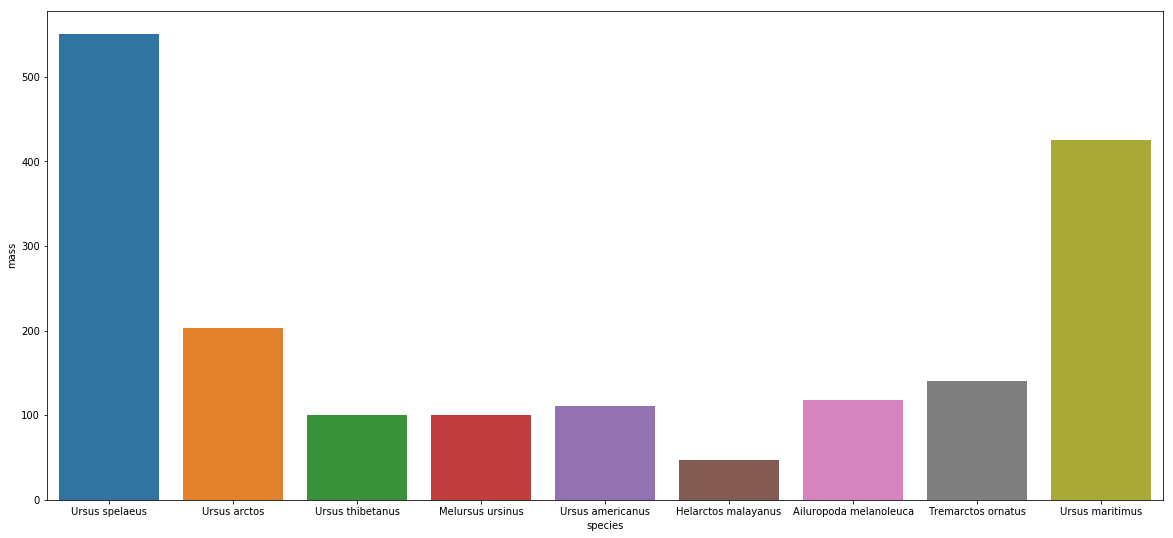

In [32]:
fig, ax = plt.subplots(figsize = plot_dims) # fixes the previously specified  dimension to the graph
sns.barplot('species','mass', data = bears_df) #creates a bar-chart for speceis and mass
ax.set(xlabel = 'species', ylabel = 'mass') # sets the labels for the x and the y axes

1. Ursus spelaeus or cave bear is the largest bear in the list.
2. This is an extinct species of bear. There is some evidence of hybridization of cave bears with brown bears with estimation of 0.9 to 2.4% cave bear DNA persisting in the Brown bear genome.

[Barlow, Axel, et al. "Partial genomic survival of cave bears in living brown bears." Nature ecology & evolution 2.10 (2018): 1563.]

#### 9. Ploting visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

Text(-6.67499999999999, 0.5, 'Molecular Weigth')

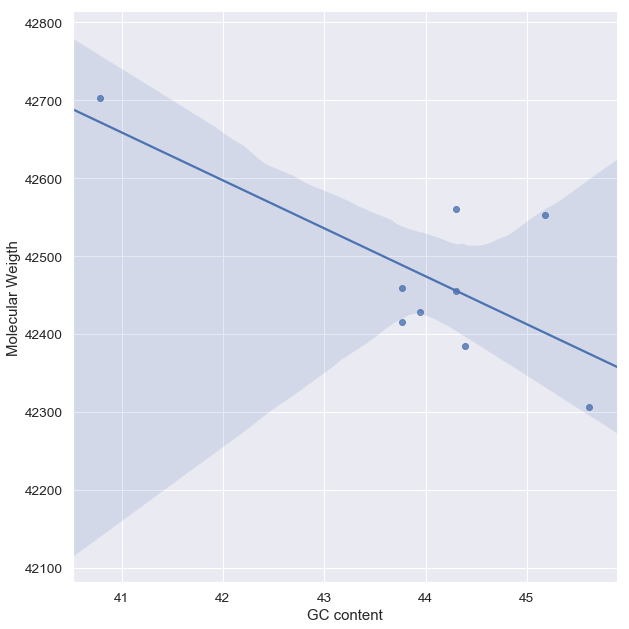

In [35]:
sns.set(font_scale=1.25) #setting the fontsize for the visualization
fig, 
sns.lmplot(data = bears_df, x = 'gc_content', # Ploting visualization of the molecular weight (y-axis) as a function of GC-content (x-axis)
    y = 'molecular_weight',
    height = 9,    aspect =1 ) # size and dimension

plt.xlabel('GC content') #setting the labels
plt.ylabel('Molecular Weigth')

#### 10. Saving the bears_df pandas dataframe as a csv file without a colum for indexing

In [351]:
bears_df.to_csv("bears_mass_cytb.csv", index = False)

#### 11.1 Codes for plotting the nucletide diversity in each postion across the nucleotide sequence  
Since the sequence length are the same we can assume the alignment to be the same and we can take the fasta file as an alignment to see the diversity of nucleotide in each position.

In [39]:
# Following prepares a dataframe with postion and diversity in the nucleotide which will be piped into a plotting code.

DNA_seq = [] # declare an empty list 
for key in cytb_seqs: #parses through each element in the dictionary
    DNA_seq.append(str(cytb_seqs[key])) #saves each sequence in the list
    
data = pd.DataFrame(columns=["Diversity"],index=range(0,len(DNA_seq[0]))) #creating a empty dataframe with a row for each nucleotide position

for i in range(0,len(DNA_seq[0]),1): # iterates through each nucleotide positon in to the length of th the sequence 
        Nucleotide= []
        for j in range(0,9,1): # saves each nucletide from all 9 species at the  jth position in a list
            DNA = DNA_seq[j]
            Nucleotide.append( DNA[i:i+1])
        data.iloc[i]=[len(set(Nucleotide))]   # calculates the number of unique nucleotides in each positon and saces it to the corresponding position in the dataframe

data["position"] =data.index+1  #adds a new colum for the position as it starts from 1 unlike the index in python

data.head(5)

,Diversity,position
0,1,1
1,1,2
2,1,3
3,1,4
4,2,5


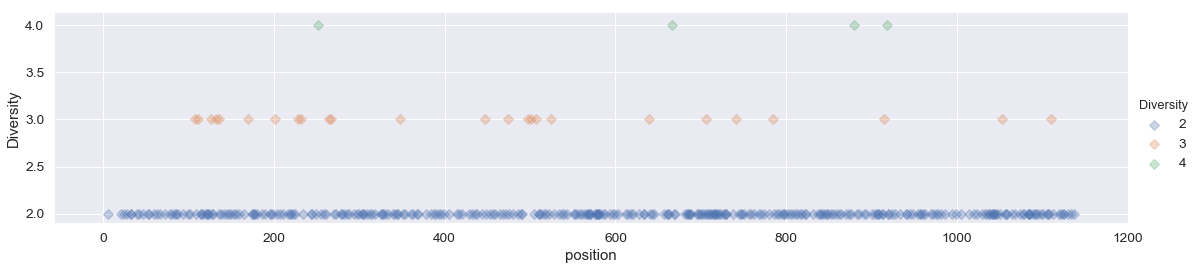

In [41]:
#plotting the diversity across each positon in the sequence

my_fig = sns.lmplot( "position", "Diversity", data=data[(data.Diversity!=1)], #plotting using position as the x-axis and diversity as y
                    fit_reg=False,
                    height=4, 
                    aspect=4,
                    scatter_kws={'alpha':0.3,"s": 50},
                    hue = "Diversity", markers='D')


A diversity of 1 means no change in nucleotide at all. 

#### 11.2 Codes for plotting the amino acid diversity in each postion across the nucleotide sequence  
The codes are the same as 11.1 only difference is instead of DNA sequence we translate them to amino acid sequence

In [43]:
# Saving aa sequences in a list after translating them
AA_seq = [] 
for key in cytb_seqs:
    AA_seq.append(translate_function_2(str(cytb_seqs[key])))

In [49]:
dataAA = pd.DataFrame(columns=["Diversity"],index=range(0,len(AA_seq[0]))) #creating a empty dataframe with a row for each nucleotide position

for i in range(0,len(AA_seq[0]),1): # iterates through each amino acid positon in to the length of th the sequence 
        AA = []
        for j in range(0,9,1): # saves each nucletide from all 9 species at the  jth position in a list
            aa = AA_seq[j]
            AA.append( aa[i:i+1])
        dataAA.iloc[i]=[len(set(AA))]   # calculates the number of unique aas in each positon and saces it to the corresponding position in the dataframe

dataAA["position"] =dataAA.index+1  #adds a new colum for the position as it starts from 1 unlike the index in python

dataAA

,Diversity,position
0,1,1
1,2,2
2,1,3
3,1,4
4,1,5
5,1,6
6,1,7
7,1,8
8,1,9
9,1,10


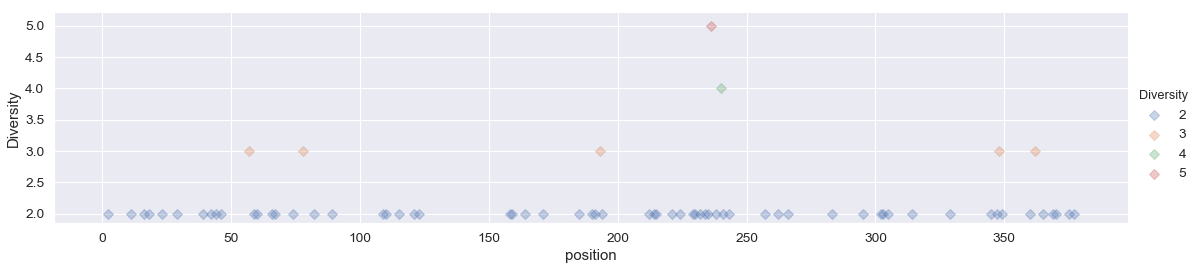

In [50]:
#plotting the diversity across each positon in the sequence not looking at sites with no diversity
my_fig = sns.lmplot( "position", "Diversity", data=dataAA[(dataAA.Diversity!=1)],
                    fit_reg=False,
                    height=4,
                    aspect=4,
                    scatter_kws={'alpha':0.3,"s": 50},
                    hue = "Diversity", markers='D')


Looking through the two graphs we see that nuclotide diversity doesn not really translate into amino acid diversity which is due to the degenerecy of the genetic code.